In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv


Amžiaus vidurkis: -64.53124215809285
Amžiaus mediana: -63.0
Lyties pasiskirstymas:
 gender
MALE      3369
FEMALE     616
Name: count, dtype: int64
Vėžio tipai:
 icd_o_3_histology
8140/3    1968
8070/3    1857
8071/3     100
8480/3      20
8083/3      20
8211/3      20
Name: count, dtype: int64
Vėžio klinikinės stadijos:
 stage_event_clinical_stage
Stage IIA     440
Stage IIIA    200
Stage III     180
Stage IIB     159
Stage IV      140
Stage IA       40
Stage IVA      40
Stage IB       39
Stage IVB      20
Stage II       20
Stage IIIB     20
Stage IIIC     20
Name: count, dtype: int64
Vėžio gydymo analizė:
 primary_pathology_treatment_prior_to_surgery
No Treatment                  1098
Radiation and Chemotherapy      40
Name: count, dtype: int64
Paciento rezultatų analizė:
 count    1360.000000
mean       73.823529
std        16.096601
min        20.000000
25%        60.000000
50%        80.000000
75%        90.000000
max       100.000000
Name: primary_pathology_karnofsky_performance_s

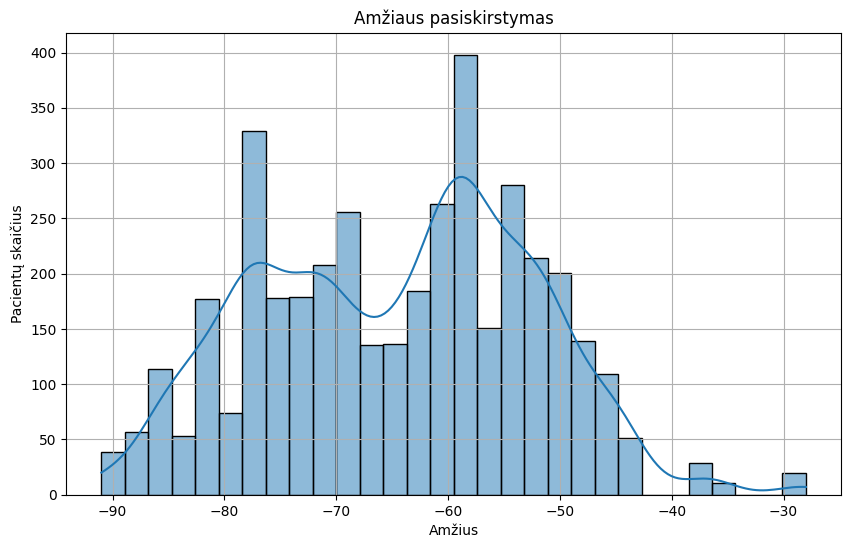

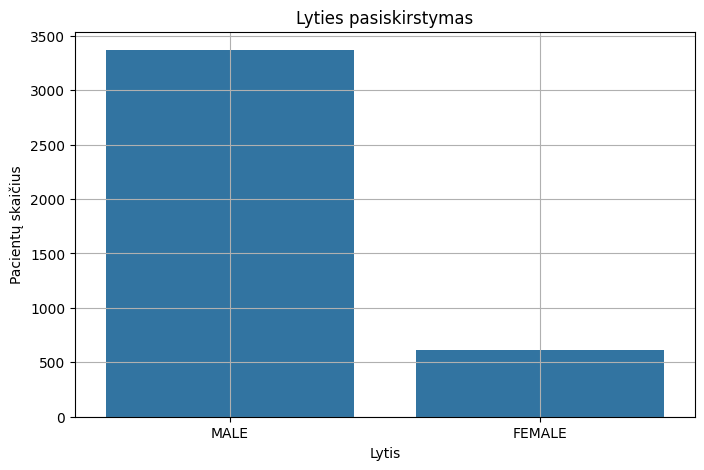

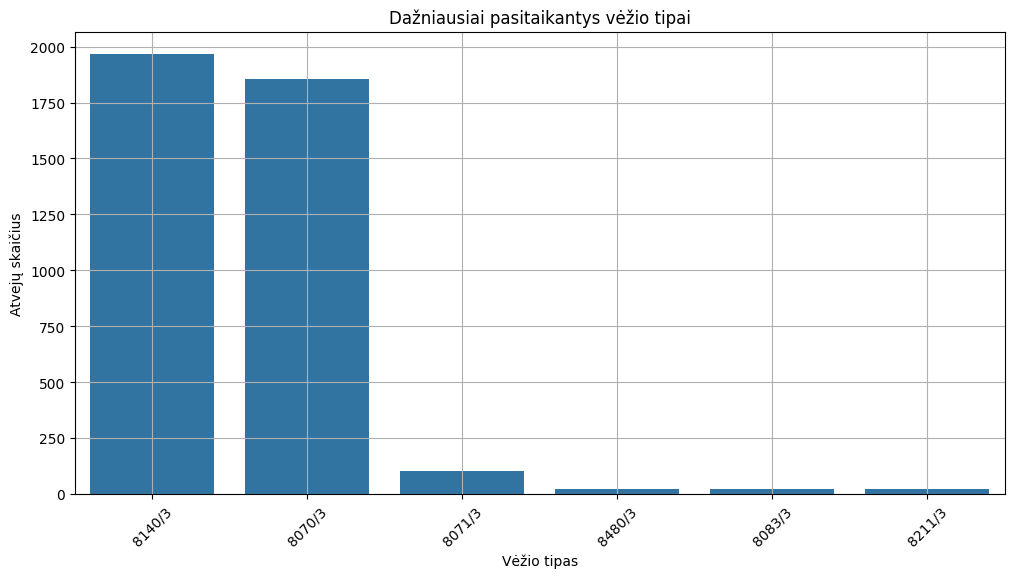

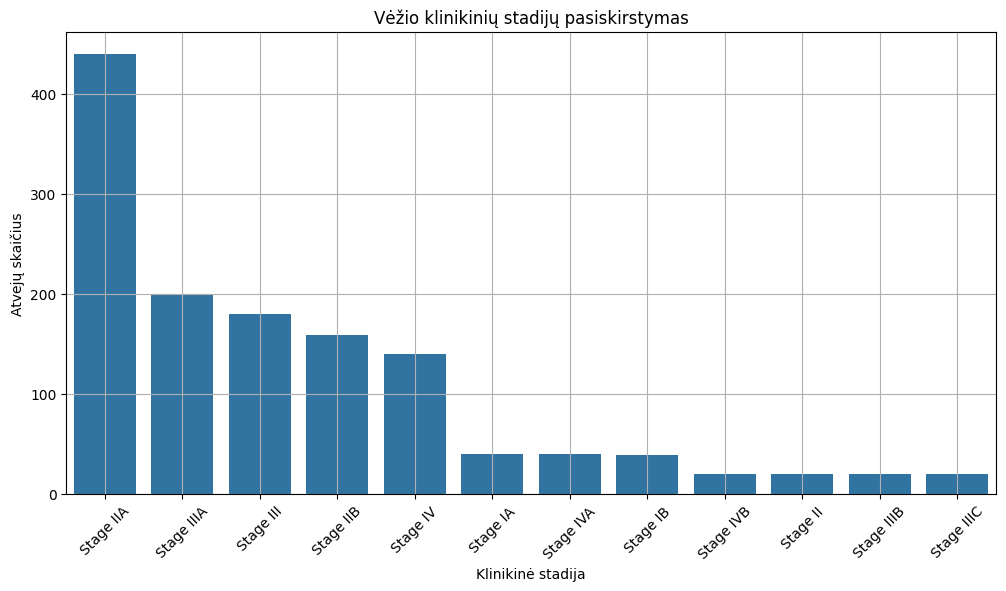

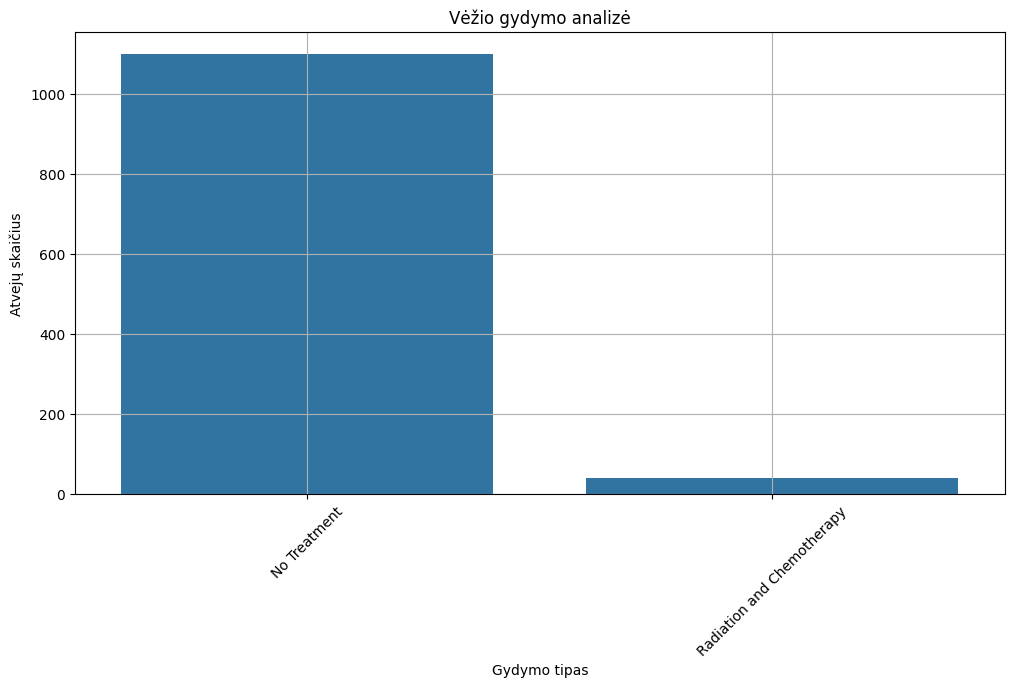

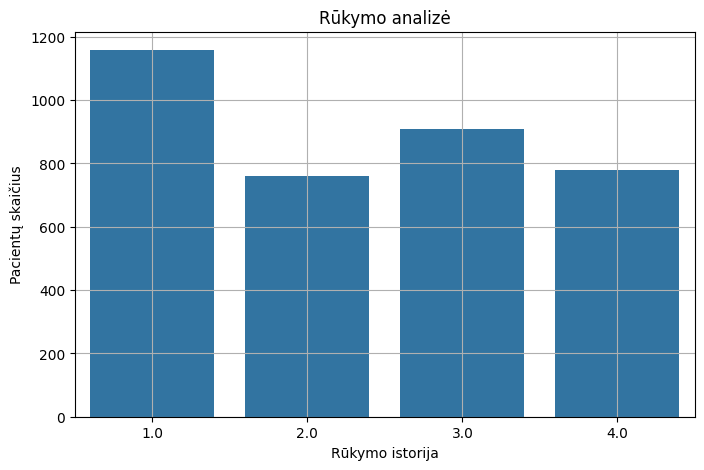

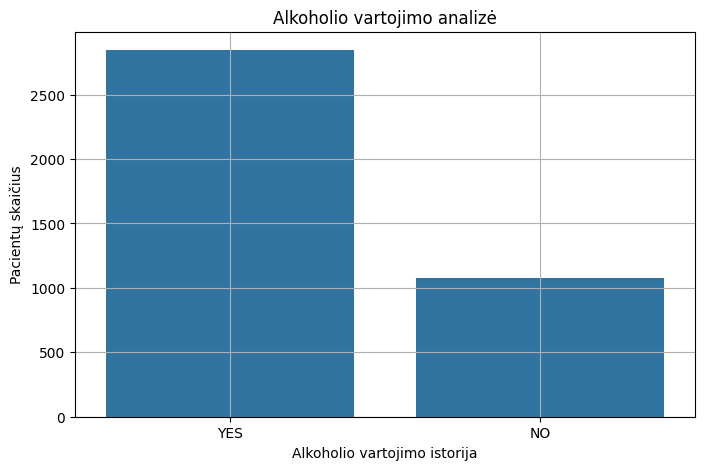

In [ ]:


data = pd.read_csv("C:/Users/Silver/Downloads/Esophageal_Dataset(1).csv")  

data['height'] = data['height'].fillna(data['height'].mean())
data['weight'] = data['weight'].fillna(data['weight'].mean())

if 'days_to_birth' in data.columns:
    # Ensure days_to_birth is numeric
    data['days_to_birth'] = pd.to_numeric(data['days_to_birth'], errors='coerce')

    # Calculate age in years, handling potential negative values
    data['age'] = data['days_to_birth'].apply(lambda x: abs(x) // 365 if pd.notnull(x) else np.nan)

data['has_harmful_habit'] = np.where(data['tobacco_smoking_history'].notnull(), 'Yes', 'No')

try:
    age_mean = data['age'].mean()
    age_median = data['age'].median()
    gender_distribution = data['gender'].value_counts()

    print("Amžiaus vidurkis:", age_mean)
    print("Amžiaus mediana:", age_median)
    print("Lyties pasiskirstymas:\n", gender_distribution)
except Exception as e:
    print("Demografinės analizės klaida:", e)

try:
    cancer_types = data['icd_o_3_histology'].value_counts()
    clinical_stages = data['stage_event_clinical_stage'].value_counts()

    print("Vėžio tipai:\n", cancer_types)
    print("Vėžio klinikinės stadijos:\n", clinical_stages)
except Exception as e:
    print("Vėžio tipų ir stadijų analizės klaida:", e)

try:
    treatment_analysis = data['primary_pathology_treatment_prior_to_surgery'].value_counts()
    print("Vėžio gydymo analizė:\n", treatment_analysis)
except Exception as e:
    print("Vėžio gydymo analizės klaida:", e)

try:
    performance_scores = data['primary_pathology_karnofsky_performance_score'].describe()
    print("Paciento rezultatų analizė:\n", performance_scores)
except Exception as e:
    print("Paciento rezultatų analizės klaida:", e)

try:
    smoking_analysis = data['tobacco_smoking_history'].value_counts()
    alcohol_analysis = data['alcohol_history_documented'].value_counts()

    print("Rūkymo analizė:\n", smoking_analysis)
    print("Alkoholio vartojimo analizė:\n", alcohol_analysis)
except Exception as e:
    print("Išorinių faktorių analizės klaida:", e)


plt.figure(figsize=(10, 6))
sns.histplot(data['age'].dropna(), bins=30, kde=True)
plt.title('Amžiaus pasiskirstymas')
plt.xlabel('Amžius')
plt.ylabel('Pacientų skaičius')
plt.grid()
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(x=gender_distribution.index, y=gender_distribution.values)
plt.title('Lyties pasiskirstymas')
plt.xlabel('Lytis')
plt.ylabel('Pacientų skaičius')
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=cancer_types.index[:10], y=cancer_types.values[:10])
plt.title('Dažniausiai pasitaikantys vėžio tipai')
plt.xlabel('Vėžio tipas')
plt.ylabel('Atvejų skaičius')
plt.xticks(rotation=45)
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x= clinical_stages.index, y=clinical_stages.values)
plt.title('Vėžio klinikinių stadijų pasiskirstymas')
plt.xlabel('Klinikinė stadija')
plt.ylabel('Atvejų skaičius')
plt.xticks(rotation=45)
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=treatment_analysis.index, y=treatment_analysis.values)
plt.title('Vėžio gydymo analizė')
plt.xlabel('Gydymo tipas')
plt.ylabel('Atvejų skaičius')
plt.xticks(rotation=45)
plt.grid()
plt.show()



plt.figure(figsize=(8, 5))
sns.barplot(x=smoking_analysis.index, y=smoking_analysis.values)
plt.title('Rūkymo analizė')
plt.xlabel('Rūkymo istorija')
plt.ylabel('Pacientų skaičius')
plt.grid()
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(x=alcohol_analysis.index, y=alcohol_analysis.values)
plt.title('Alkoholio vartojimo analizė')
plt.xlabel('Alkoholio vartojimo istorija')
plt.ylabel('Pacientų skaičius')
plt.grid()
plt.show()

data.to_csv('processed_data.csv', index=False)

### Išvados

1. **Amžiaus analizė**:
   - Vidutinis amžius yra 64.5 metų, o mediana – 63 metai. Tai rodo, kad tiriamoji populiacija yra vyresnio amžiaus, kas gali būti svarbu, nes vėžys dažnai pasitaiko vyresniems žmonėms.

2. **Lyties pasiskirstymas**:
   - Tiriamoje populiacijoje vyrai sudaro didžiąją dalį (3369), o moterys – tik 616. Tai rodo, kad liga labiau paveikia vyrus, arba kad tyrimas buvo orientuotas į vyriškąją populiaciją.

3. **Vėžio tipų pasiskirstymas**:
   - Dažniausiai pasitaikantys vėžio tipai yra 8140/3 (1968 atvejai) ir 8070/3 (1857 atvejai). Tai gali rodyti, kad šie vėžio tipai yra labiausiai paplitę tiriamoje populiacijoje ir gali reikalauti daugiau dėmesio gydymo ir tyrimų srityje.

4. **Vėžio klinikinių stadijų analizė**:
   - Didžiausias atvejų skaičius yra II A stadijoje (440 atvejų), o IV stadijoje – 140 atvejų. Tai rodo, kad dauguma pacientų yra diagnozuojami ankstyvose stadijose, tačiau taip pat yra reikšmingas skaičius pacientų, kuriems diagnozuotas pažengęs vėžys.

5. **Alkoholio vartojimo analizė**:
   - Dauguma pacientų (2846) turi dokumentuotą alkoholio vartojimą, o 1079 – ne. Tai gali rodyti, kad alkoholio vartojimas yra svarbus rizikos veiksnys, susijęs su vėžio išsivystymu.

### Rekomendacijos

1. **Ankstyva diagnostika**:
   - Kadangi didžioji dalis pacientų yra diagnozuojami ankstyvose stadijose, rekomenduojama skatinti ankstyvą vėžio diagnostiką ir reguliarius patikrinimus, ypač tiems, kurie priklauso vyresnio amžiaus grupei.

2. **Lyties specifinės prevencijos programos**:
   - Atsižvelgiant į didesnį vyrų skaičių, rekomenduojama sukurti lyties specifines prevencijos programas, kurios būtų orientuotos į vyrų sveikatą ir vėžio prevenciją.

3. **Tyrimai dėl vėžio tipų**:
   - Rekomenduojama atlikti tolesnius tyrimus, siekiant geriau suprasti dažniausiai pasitaikančių vėžio tipų (8140/3 ir 8070/3) etiologiją ir gydymo metodus.

4. **Išorinių veiksnių analizė**:
   - Rekomenduojama atlikti išsamesnę analizę, kaip alkoholio vartojimas ir kiti gyvenimo būdo veiksniai (pvz., rūkymas) gali paveikti vėžio riziką, ir sukurti švietimo programas, skirtas rizikos veiksnių mažinimui.

5. **Bendradarbiavimas su specialistais**:
   - Rekomenduojama bendradarbiauti su onkologijos specialistais ir epidemiologais, siekiant geriau suprasti vėžio paplitimą ir efektyviau spręsti šią problemą.